In [1]:
# https://towardsdatascience.com/audio-classification-with-pre-trained-vgg-19-keras-bca55c2a0efe
#https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

In [59]:
from pydub import AudioSegment
from scipy.io.wavfile import read
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import sklearn

# PyDUB

In [60]:
sound = AudioSegment.from_mp3('Dataset/TringTring/1.mp3')
sound.export("Dataset/TringTring/1.wav", format="wav")

<_io.BufferedRandom name='Dataset/TringTring/1.wav'>

In [63]:
audio = read("Dataset/TringTring/1.wav")

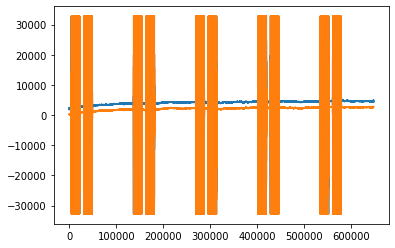

In [64]:
plt.plot(audio[1])

# Librosa

In [65]:

audio_path='Dataset//TringTring/1.mp3'

In [66]:
x , sr = librosa.load(audio_path, sr=44100)

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [67]:
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [68]:
print(x.shape, sr)

(647168,) 44100


In [69]:
#librosa.load(audio_path, sr=44100)
#librosa.load(audio_path, sr=None)

In [70]:
ipd.Audio(audio_path)


## Waveform

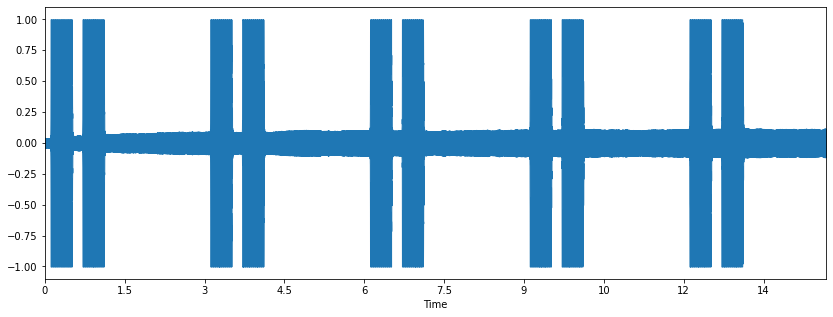

In [73]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Spectogram

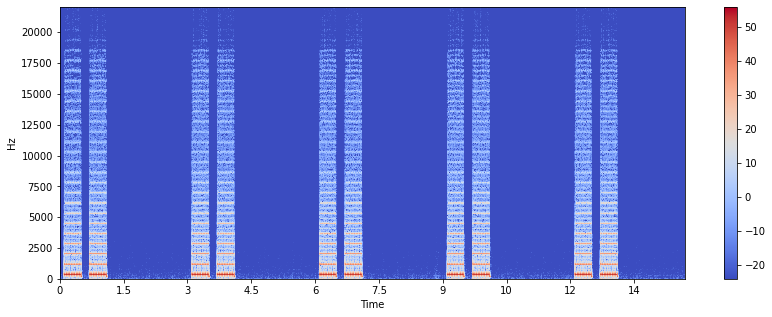

In [35]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

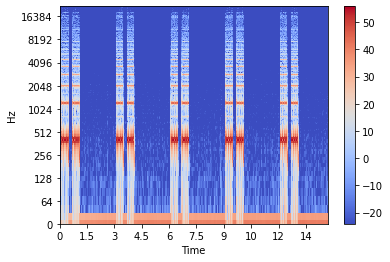

In [36]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Writing Wav

In [38]:
librosa.output.write_wav('example.wav', x, sr)
ipd.Audio('example.wav')

## Creating audio signal

In [43]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
# Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array

In [44]:
# Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

## Zero crossing rate

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


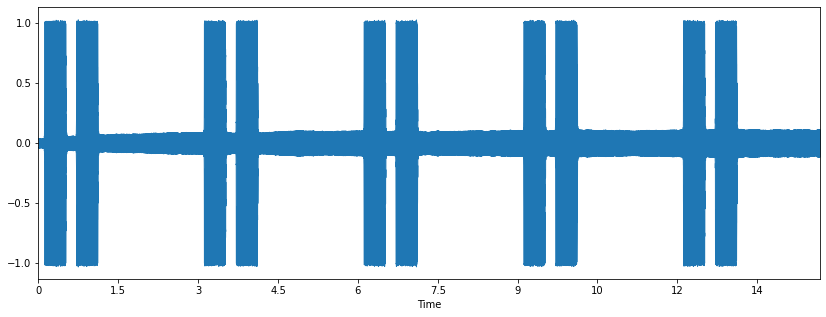

In [45]:
# Load the signal
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

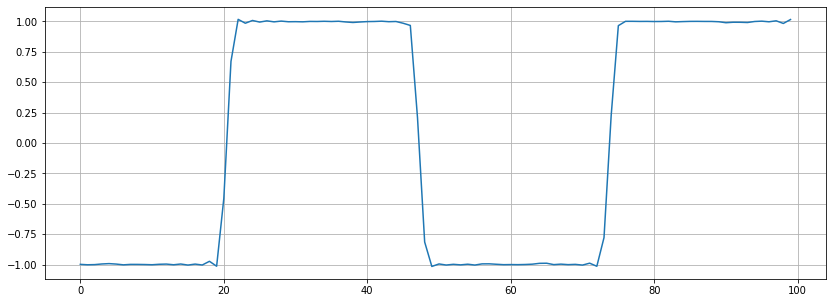

In [46]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [47]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

3


## Spectral centroids

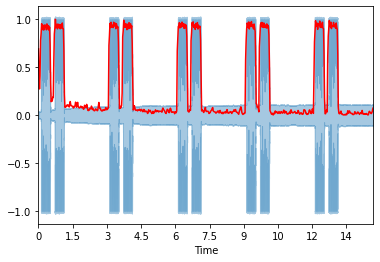

In [50]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Spectral rolloff

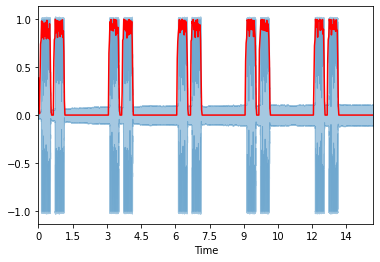

In [51]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Mel-Frequency Cepstral Coefficients

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


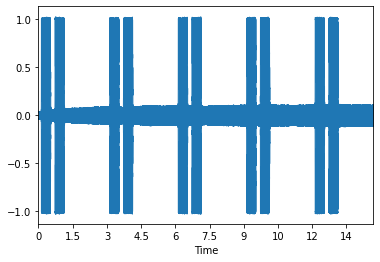

In [52]:
x, fs = librosa.load(audio_path)
librosa.display.waveplot(x, sr=sr)

(20, 633)


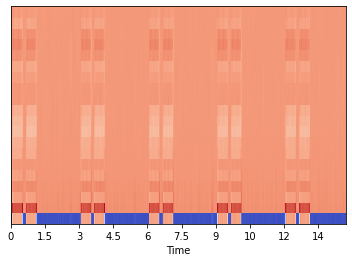

In [54]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print (mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


[ 2.4105512e-08 -6.0263781e-09  0.0000000e+00 -9.0395673e-09
 -1.2052756e-08  0.0000000e+00  0.0000000e+00  1.2052756e-08
 -1.2052756e-08  6.0263781e-09 -1.2052756e-08  0.0000000e+00
 -3.0131890e-09  0.0000000e+00 -1.2052756e-08  6.0263781e-09
 -6.0263781e-09  9.0395673e-09  0.0000000e+00  0.0000000e+00]
[1.        1.        1.        1.        1.        1.        1.
 1.0000002 1.0000001 1.        1.        1.        1.0000002 1.0000001
 1.        1.0000001 1.        1.0000001 1.0000001 1.0000001]


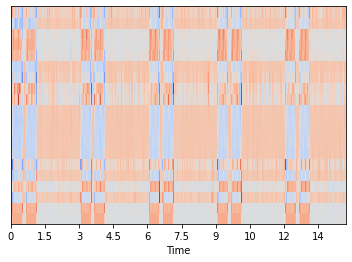

In [56]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
var = librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Chroma Frequencies

/Users/mayank.gupta/venv/audio/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


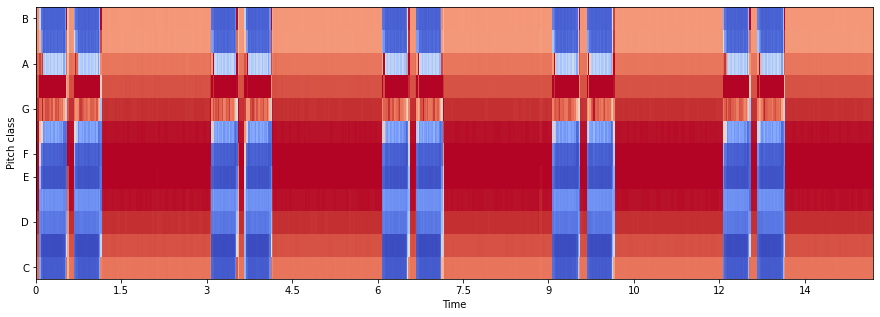

In [58]:
# Loadign the file
x, sr = librosa.load(audio_path)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')